In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!kaggle datasets download -d ascanipek/skin-diseases

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/skin-diseases.zip', 'w')
zip_ref.extractall('/content')
zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/skin-diseases.zip'

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/final_skin_disease_model.h5')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
test_image = image.load_img('Screenshot 2023-09-24 112342.png',target_size=(224,224))

test_image = image.img_to_array(test_image)
test_image /= 255.0
test_image = np.expand_dims(test_image, axis = 0)

FileNotFoundError: ignored

1/1 [==============================] - 0s 160ms/step


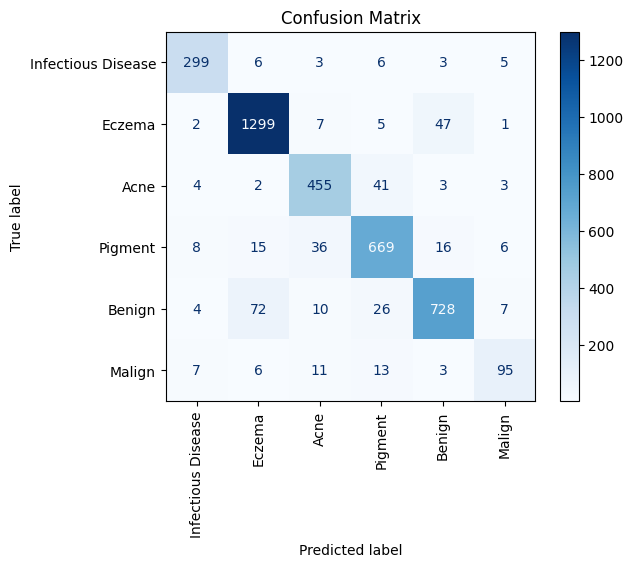

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('/content/final_skin_disease_model.h5')

class_labels = ["Infectious Disease", "Eczema", "Acne", "Pigment", "Benign", "Malign"]

true_labels = []
predicted_labels = []

test_data_dir = '/content/kaggle/val'

for class_label in class_labels:
    folder_path = os.path.join(test_data_dir, class_label)
    for image_filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_filename)

        test_image = image.load_img(image_path, target_size=(224, 224))
        test_image = image.img_to_array(test_image)
        test_image /= 255.0
        test_image = np.expand_dims(test_image, axis=0)

        predictions = model.predict(test_image)
        predicted_class_index = np.argmax(predictions)
        predicted_class_label = class_labels[predicted_class_index]

        true_labels.append(class_label)
        predicted_labels.append(predicted_class_label)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()
